# **Potential Public Solutions**
The following is a summary of research papers/articles (with links) that focus on classifying spam emails. Since my dataset contains both the [SpamAssassin](https://spamassassin.apache.org/old/publiccorpus/) and [Enron Spam](https://www2.aueb.gr/users/ion/data/enron-spam/) datasets, this section will be split into two parts, each corresponding with one of the datasets.

### **Solution with the SpamAssassin dataset:**

#### **"[Email Spam Classification](https://medium.com/@yesprabhakaran98/email-spam-classification-92b661d3b700)"** by prabhakran98  (via medium.com):

***Dataset***:
- [SpamAssassin dataset](https://spamassassin.apache.org/old/publiccorpus/)

***Data Preprocessing***:
- Perform **TF-IDF** on the text corpus  
  >TF-IDF is an algorithm that uses the frequency of words to determine how relevant those words are to a given document.
  
***Model Training Techniques & Evaluation***:

| Model                     | Accuracy    | F 0.5 Score
| :-----------------------: | :---------: | :----------:
| **Random Forest**         | 0.98        | 0.98
| **XGBoost**               | 0.97        | 0.96
| **Decision Tree**         | 0.93        | 0.93
| **Logistic Regression**   | 0.93        | 0.93
| **Naive Bayes**           | 0.89        | 0.90
| **KNN**                   | 0.67        | 0.54

  >Notes:
  - All models included hyperparameter tuning using a grid search
  - F 0.5 Score is used as a metric (rather than F1 score) since the SpamAssassin dataset is imbalanced

  ***Conclusion***:  
  Ensemble Models perform better, especially the **Random Forest model**, as it had the highest accuracy and F 0.5 score.   
  However, all models acheive a 90+ score except for K Nearest Neighbor.

### **Solution with the Enron Spam dataset:**

#### **"[Empirical Analysis on Email Classification Using the Enron Dataset](https://towardsdatascience.com/empirical-analysis-on-email-classification-using-the-enron-dataset-19054d558697)"** by Suleka Helmini  (via towardsdatascience.com):
- [Github Code Link](https://github.com/suleka96/Email-Classification)

***Dataset***:
- [Enron Spam dataset](https://www2.aueb.gr/users/ion/data/enron-spam/)

***Data Preprocessing***:  
For the ML models:  
- Utilize a **bag-of-words** approach:  
> First, make a dictionary of the 3000 most common words in the corpus. Then iterate through the eamils and record the occurence frequency of each token in the email corresponding to the token in the dictionary.

For the DL model (i.e. the Recurrent Neural Network):
- Utilize a slightly different **bag-of-words** approach:  
> First, create a dictionary of all the words in the corpus and index them starting from 1. Then iterate through the emails, and map each word to the corresponding index in the dictionary (this ensures the sequence of words is retained). Finally, to ensure all the emails have the same length, pad all the emails to the length of the longest email by adding 0's to the beginning of each sequence.

***Model Training Techniques & Evaluation***:

| ML Model                          | Accuracy | F1 Score| Recall|Precision     
| :-------------------------------: | :-------:| :-----: | :----:| :------:
| **Logistic Regression**           | 0.973    | 0.969   | 0.972 | 0.966
| **Random Forest Classifier**      | 0.971    | 0.966   | 0.969 | 0.964
| **Support Vector Classification** | 0.958    | 0.952   | 0.962 | 0.943


> Notes:
  - All ML models included manual hyperparameter tuning

| DL Model                             | Accuracy  | F1 Score| Recall|Precision
| :----------------------------------: | :-------: | :-----: | :----:| :------:
| **Recurrent Neural Network (LSTM)**  | 0.981     | 0.980   | 0.980 | 0.981
> Notes:
  - Cost function: softmax cross entropy with logits
  - Optimization function: Adam optimizer
  - Activation function: sigmoid

  ***Conclusion***:  
  Logistic Regression outperformed all of the ML Models, but the **LSTM model** outperformed the logistic regression algorithm because of its ability to model long term dependencies.

# **Reproduction of Available Solutions**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load clean data into a pandas dataframe
DATA_PATH = "/content/drive/My Drive/UCSD Machine Learning Engineering Bootcamp/Capstone Project/"
df = pd.read_csv(DATA_PATH + 'CleanData.csv')

### **Reproduction of SpamAssassin dataset Solution:**
(TF-IDF for the preprocessing, and a Random Forest model for the training)

****NOTE**: the article did not have a link to the code, so I had to code it myself

In [3]:
df1 = df

#### Step 1: TF-IDF

In [4]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the tfidf vectorizer
tfidf_vec = TfidfVectorizer(max_features=10000)
# convert Clean_Text to numbers with TfidfVectorizer
tfidf = tfidf_vec.fit_transform(df1['Clean_Text'])

In [5]:
# convert the tfidf data features to array
tfidf = tfidf.toarray()
# show shape of the feature vector
tfidf.shape

(39763, 10000)

#### Step 2: Preliminary Random Forest model

In [6]:
# Split data into training and testing set
X_idf = tfidf
y = df1.Label
X_train, X_test, y_train, y_test = train_test_split(X_idf, y, test_size=0.3, shuffle=True)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      6245
         1.0       0.97      0.99      0.98      5684

    accuracy                           0.98     11929
   macro avg       0.98      0.98      0.98     11929
weighted avg       0.98      0.98      0.98     11929



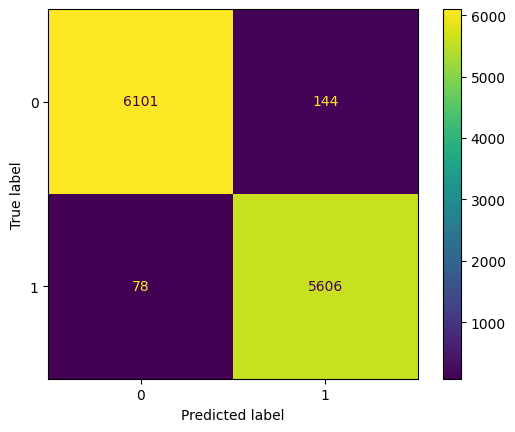

In [7]:
# Random Forest: initial fitting
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_model = RandomForestClassifier()

# Fit the random forest classifier to the data
rf_model.fit(X_train, y_train)

# Generate Predictions
y_pred = rf_model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [8]:
# Look at parameters used by our current random forest
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Step 3: Random Forest Hyperparameter Tuning

In [21]:
# Random Forest: hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters, using 3 fold cross validation
# across 100 different combinations
grid_search = RandomizedSearchCV(rf,
                                 param_distributions = random_grid,
                                 n_iter=20,
                                 cv=3,
                                 verbose=3)

# Fit the random search object to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.974 total time=49.6min
[CV 2/3] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.975 total time=49.8min
[CV 3/3] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.974 total time=49.1min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=0.968 total time=12.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=0.970 total time=12.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=0.970 total time=12.9min
[CV 1/3] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800;, score=0.977 total time=48.9min
[CV 2/3] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800;, score=0.978 total time=49.2min
[CV 3/3] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800;, score=0.977 total time=48.6min
[CV 1/3] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.976 total time=52.9min
[CV 2/3] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.976 total time=53.1min
[CV 3/3] END bootstrap=False, max_depth=110, max_features=sqrt, mi

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.940 total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.944 total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.950 total time= 1.7min
[CV 1/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=0.943 total time= 4.7min
[CV 2/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=0.942 total time= 4.7min
[CV 3/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=0.951 total time= 4.7min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000;, score=0.976 total time=15.0min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000;, score=0.977 total time=15.2min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000;, score=0.975 total time=15.0min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200;, score=0.975 total time=28.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200;, score=0.977 total time=27.8min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200;, score=0.974 total time=27.4min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.973 total time=20.6min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.974 total time=20.5min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.972 total time=20.7min
[CV 1/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=0.961 total time= 6.7min
[CV 2/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=0.961 total time= 6.5min
[CV 3/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=0.963 total time= 6.5min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600;, score=0.945 total time= 9.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600;, score=0.945 total time= 9.2min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600;, score=0.950 total time= 9.2min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200;, score=0.973 total time=25.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200;, score=0.975 total time=24.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200;, score=0.973 total time=24.9min
[CV 1/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=0.963 total time=13.9min
[CV 2/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=0.961 total time=13.7min
[CV 3/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=0.965 total time=13.5min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200;, score=0.966 total time=12.6min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/3] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200;, score=0.967 total time=12.7min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/3] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200;, score=0.967 total time=12.8min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/3] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.975 total time=22.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Unfortunately the above Randomized Grid Search did not complete after 24+ hours of runtime, and none of its random models acheived a higher score than the preliminary model (with default hyperparameters) in the previous section.

#### Random Forest Results

In [9]:
# Random Forest model metrics
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

print("Random Forest Results:")
print("Test accuracy: {:.3f}".format(accuracy))
print("F1 Score: {:.3f}".format(f1))
print("Recall: {:.3f}".format(recall))
print("Precision: {:.3f}".format(precision))

Random Forest Results
Test accuracy: 0.981
F1 Score: 0.981
Recall: 0.982
Precision: 0.981


My **Random Forest model acheived an accuracy, f1 score, and precision of 0.981, and a recall of 0.982**. This model's performance is roughly identical to the performance of the Random Forest model used in the article for the SpamAssassin dataset.

### Reproduction of Enron Spam dataset Solution:
(Bag of words for the preprocessing, and a LSTM model for the training)

****NOTE**: the article did have a [Github link](https://github.com/suleka96/Email-Classification/blob/master/Enron_LSTM.py) to the code, so I just copy and pasted it

In [3]:
df = pd.read_csv('CleanData.csv')

In [4]:
df2 = df

In [1]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.1
    Uninstalling pip-23.1:
      Successfully uninstalled pip-23.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf

In [ ]:
# method to get data with the same batch size
def get_batches(x, y, batch_size=100):
    n_batches = len(x) // batch_size
    x, y = x[:n_batches * batch_size], y[:n_batches * batch_size]
    for ii in range(0, len(x), batch_size):
        yield x[ii:ii + batch_size], y[ii:ii + batch_size]

In [ ]:
# train and test the LSTM model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from collections import Counter
import time

def train_test(df):
    start = time.time()

    # -----------------Train/Validation/Test Split------------------------------
    start_split = time.time()

    # set features and labels
    features = df.Clean_Text
    labels = df.Label

    split_frac1 = 0.8

    idx1 = int(len(features) * split_frac1)
    train_x, val_x = features[:idx1], features[idx1:]
    train_y, val_y = labels[:idx1], labels[idx1:]

    split_frac2 = 0.5

    idx2 = int(len(val_x) * split_frac2)
    val_x, test_x = val_x[:idx2], val_x[idx2:]
    val_y, test_y = val_y[:idx2], val_y[idx2:]

    print("-----------------Train/Validation/Test Split-----------------\n")
    print("\nFeature Shapes:")
    print("Train set: \t\t{}".format(train_x.shape),
          "\nValidation set: \t{}".format(val_x.shape),
          "\nTest set: \t\t{}".format(test_x.shape))

    print("\nLabel Shapes:")
    print("Train set: \t\t{}".format(train_y.shape),
          "\nValidation set: \t{}".format(val_y.shape),
          "\nTest set: \t\t{}".format(test_y.shape))
    
    end_split = time.time()
    print("\nTime Elapsed: \t\t{}\n".format(end_split - start_split))

    # -----------------Initialize Values----------------------------------------

    start_initialize = time.time()

    # set LSTM variables
    epochs = 15
    lstm_layers = 1
    batch_size = 179
    lstm_size = 30
    learning_rate = 0.003

    # set number of unique words
    #n_words = 1 + len(
    #    list(df['Clean_Text'].str.split(' ', expand=True).stack().unique()))

    unique_words = Counter()
    df['Clean_Text'].apply(lambda x: unique_words.update(x.split()))
    n_words = len(unique_words)

    print("\n---------------Initialized Values--------------------------\n")
    print("Number of unique words: \t\t{}".format(n_words),
          "\nLSTM size: \t\t{}".format(lstm_size),
          "\nLSTM layers: \t\t{}".format(lstm_layers),
          "\nBatch size: \t\t{}".format(batch_size),
          "\nEpochs: \t\t{}".format(epochs),
          "\nLearning Rate \t\t{}".format(learning_rate))
    
    end_initialize = time.time()
    print("\nTime Elapsed: \t\t{}\n".format(end_initialize - start_initialize))

    # -----------------Placeholders---------------------------------------------

    graph = tf.Graph()

    with graph.as_default():

        tf.set_random_seed(1)

        inputs_ = tf.placeholder(tf.int32, [None, None], name="inputs")
        labels_ = tf.placeholder(tf.float32, [None, None], name="labels")

        keep_prob = tf.placeholder(tf.float32, name="keep_prob")

        embed_size = 300

        embedding = tf.Variable(tf.random_uniform((n_words, embed_size), -1, 1))
        embed = tf.nn.embedding_lookup(embedding, inputs_)
        print(embedding.shape)
        print(embed.shape)

        lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)

        drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)

        cell = tf.contrib.rnn.MultiRNNCell([drop] * lstm_layers)

        initial_state = cell.zero_state(batch_size, tf.float32)

        outputs, final_state = tf.nn.dynamic_rnn(cell, embed,
                                                 initial_state=initial_state)

        hidden1 = tf.layers.dense(outputs[:, -1], units=25, activation=tf.nn.relu)

        hidden2 = tf.layers.dense(hidden1, units=15, activation=tf.nn.relu)

        logit = tf.contrib.layers.fully_connected(hidden2, num_outputs=1,
                                                  activation_fn=None)

        cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
            logits=logit, labels=labels_))

        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

        predictions = tf.round(tf.nn.sigmoid(logit))

        saver = tf.train.Saver()

    # -----------------Training-------------------------------------------------

    with tf.Session(graph=graph) as sess:
        print("Starting Training...")
        tf.set_random_seed(1)
        sess.run(tf.global_variables_initializer())
        iteration = 1
        for e in range(epochs):
            start_train = time.time()
            state = sess.run(initial_state)
            for ii, (x, y) in enumerate(get_batches(np.array(train_x),
                                            np.array(train_y), batch_size), 1):

                feed = {inputs_: x,
                        labels_: y[:, None],
                        keep_prob: 0.5,
                        initial_state: state}
                loss, states, _ = sess.run([cost, final_state, optimizer],
                                           feed_dict=feed)

                if iteration % 5 == 0:
                    print("\nEpoch: {}/{}".format(e, epochs),
                          "Iteration: {}".format(iteration),
                          "Train loss: {:.3f}".format(loss),
                          "\nTime Elapsed: \t\t{}".format(time.time() - start_train))
                iteration += 1

        saver.save(sess, "checkpoints/sentiment.ckpt")

    # -----------------Testing Validation Set-----------------------------------
    print("Starting Validation Set...")

    start_validation = time.time()

    prediction_vals = []
    y_vals = []
    with tf.Session(graph=graph) as sess:
        tf.set_random_seed(1)
        saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))

        test_state = sess.run(cell.zero_state(batch_size, tf.float32))

        for ii, (x, y) in enumerate(get_batches(np.array(val_x), np.array(val_y),
                                                batch_size), 1):

            feed = {inputs_: x,
                    labels_: y[:, None],
                    keep_prob: 1,
                    initial_state: test_state}

            prediction = sess.run(predictions, feed_dict=feed)
            prediction = prediction.astype(int)

            for i in range(len(prediction)):
                prediction_vals.append(prediction[i][0])
                y_vals.append(y[i])

        accuracy = accuracy_score(y_vals, prediction_vals)
        f1 = f1_score(y_vals, prediction_vals, average='macro')
        recall = recall_score(y_true=y_vals, y_pred=prediction_vals, average='macro')
        precision = precision_score(y_vals, prediction_vals, average='macro')

        print("-----------------Testing Validation Set------------------")
        print("Test accuracy: {:.3f}".format(accuracy))
        print("F1 Score: {:.3f}".format(f1))
        print("Recall: {:.3f}".format(recall))
        print("Precision: {:.3f}".format(precision))

        end_validation = time.time()
        print("\nTime Elapsed: \t\t{}\n".format(end_validation - start_validation))


    # -----------------Testing Test Set-----------------------------------------
    print("Starting Testing Set...")

    start_test = time.time()

    prediction_val = []
    y_val = []
    with tf.Session(graph=graph) as sess:
        tf.set_random_seed(1)
        saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
        test_state = sess.run(cell.zero_state(batch_size, tf.float32))

        for ii, (x, y) in enumerate(get_batches(np.array(test_x),
                                                np.array(test_y), batch_size), 1):

            feed = {inputs_: x,
                    labels_: y[:, None],
                    keep_prob: 1,
                    initial_state: test_state}

            prediction = sess.run(predictions, feed_dict=feed)
            prediction = prediction.astype(int)

            for i in range(len(prediction)):
                prediction_val.append(prediction[i][0])
                y_val.append(y[i])

        accuracy = accuracy_score(y_val, prediction_val)
        f1 = f1_score(y_val, prediction_val, average='macro')
        recall = recall_score(y_true=y_val, y_pred=prediction_val, average='macro')
        precision = precision_score(y_val, prediction_val, average='macro')

        print("-----------------Testing Test Set------------------------")
        print("Test accuracy: {:.3f}".format(accuracy))
        print("F1 Score: {:.3f}".format(f1))
        print("Recall: {:.3f}".format(recall))
        print("Precision: {:.3f}".format(precision))

        end_test = time.time()
        print("\nTime Elapsed: \t\t{}\n".format(end_test - start_test))

        end = time.time()
        print("\nTotal Time Elapsed: \t\t{}\n".format(end - start))

        

In [ ]:
train_test(df2)

#### Bag of Words

In [ ]:
# Split data into training and testing set
X = df2.Clean_Text
y = df2.Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Set hyperparameters
num_words=10000
maxlen=1000

In [ ]:
# Vectorize the text samples into a 2D integer tensor
# if tokenizer doesnt work --> https://www.tensorflow.org/tutorials/load_data/text
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words, char_level=False)

# updates an internal vocabulary based on X_train
# (required before texts_to_sequences)
tokenizer.fit_on_texts(X_train)

# Transform X_train and X_test to a sequence of integers.
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

len(sequences_train)

In [ ]:
# Pad sequences with 0s so that they are all the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(sequences_train, maxlen=maxlen)
X_test = pad_sequences(sequences_test, maxlen=maxlen)

print('Shape of data tensor:', X_train.shape)
print('Shape of data test tensor:', X_test.shape)
print(type(X_train))

#### LSTM model

In [ ]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
backend.clear_session()

# set the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model(maxlen,num_words,num_categories):

    model = Sequential()

    model.add(Embedding(num_words,output_dim=100,input_length=maxlen,trainable=True))

    model.add(BatchNormalization())

    model.add(Bidirectional(LSTM(100)))

    model.add(Dropout(0.2))

    model.add(Dense(128,activation='relu'))

    model.add(BatchNormalization())

    model.add(Dense(64,activation='relu'))

    model.add(Dropout(0.2))

    model.add(Dense(32,activation='relu'))

    model.add(Dense(num_categories, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    model.summary()
    return model



In [ ]:
print('===============Create The Model==========================')
# We get to choose embedding dimensionality
D = 100
# Hidden state dimentionality
M = 64
V = len(tokenizer.word_index)
T = data_train.shape[1]

# model.add(embedding)
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = SpatialDropout1D(0.2)(x)
x = LSTM(M, return_sequences=True, activation='relu')(x)
x = GlobalAveragePooling1D()(x)
# x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
optimizer = Adam(learning_rate=1e-5)
# Compile and fit
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
print('Training model...........')
r = model.fit(data_train, y_train, epochs=15,
              validation_data=(data_test, y_test),
              batch_size=1)

print('================Model Evaluation=====================')
evaluate(model, data_train, data_test, y_train, y_test)
plot_loss_evaluation(r)

# **Analysis and Conclusion**

### **Results**:
| Model                             | Accuracy | F1 Score| Recall|Precision     
| :-------------------------------:  | :-------:| :-----: | :----:| :------:
| **Random Forest**                  | 0.981    | 0.981   | 0.981 | 0.982
| **Recurrent Neural Network (LSTM)**| 0.973    | 0.969   | 0.972 | 0.966

#### **Analysis**
Considering the obtained results, the ___ model outperformed the ____ model. However, both models achieved a ___ accuracy rate, which is not bad. Moving forward, I will most likely be utilizing a slighlty more complicated deep learning model.